# Build ML models - for mostly ROI 131 Bps window

## Use K562 cells ZFPOff vs. UNEDITED cells

In [1]:
# !  python3 -m pip install tensorflow
# !  python3 -m pip install keras
# ! python3 -m pip install 'scikit-learn'
# ! python3 -m pip install shap


In [2]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time
import shap

import sklearn

# import shap
import sys
from pathlib import Path
from datetime import datetime
# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

from funcs_analize_forward_reverse_extracted_mC_reads import plot_mCG_bars
from funcs_extract_mC_profiles_from_BAMs import (get_reference_sequence)

In [3]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [4]:
CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/K562/dimelo_v2_output/CG_12_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1001_numRVS1234_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-24.npy")
# /home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD4229_numRVS5859_padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-24.npy")
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD4229_numRVS5859_padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy")

# CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_LOW_high_K562_nCATS_20241226_numFWD1576_numRVS1339_padded_reads_LOW_high_K562_nCATS_20241226_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Theshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy


# 106 CpG units:
# Theshold 0.7 = # (
# Theshold 0.9 =   /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4723_numRVS3383_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Theshold 0.9 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4511_numRVS3269_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4478_numRVS3217_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 =(("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4220_numRVS3073_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
#
# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1., nan, nan, ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (2235, 12))

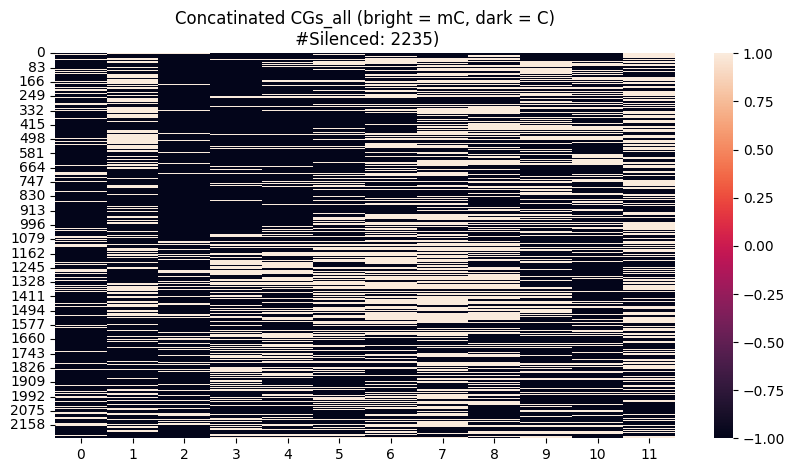

In [6]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [7]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[ 1., nan, nan, ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (2235, 12))

In [9]:
# Remove rows from 3366 to 4116
CGs_all_silenced_cut = pd.DataFrame(CGs_all_silenced_full) #[np.r_[0:2618, 4616:9350]]) #CGs_all_silenced_full.shape[0]]])
CGs_all_silenced_cut, CGs_all_silenced_cut.shape


(       0    1    2    3    4    5    6    7    8    9    10   11
 0     1.0  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN
 1     NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0
 2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0
 3     NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  NaN  NaN  NaN
 4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  NaN
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
 2230  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  NaN  1.0  NaN  1.0
 2231  1.0  NaN  NaN  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN
 2232  NaN  1.0  1.0  1.0  NaN  NaN  1.0  1.0  NaN  NaN  NaN  1.0
 2233  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 2234  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0
 
 [2235 rows x 12 columns],
 (2235, 12))

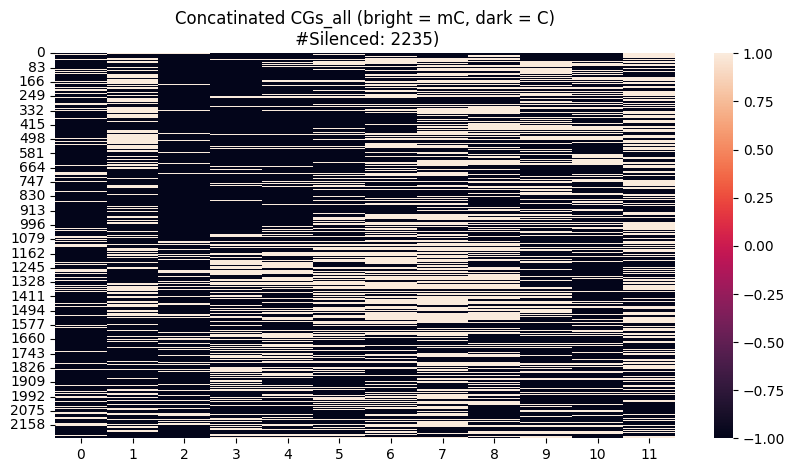

In [10]:
# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(CGs_all_silenced_cut.fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced_cut.shape[0]})")
plt.show()

In [11]:
# # plot X_unedited_silenced 
# CGs_all_silenced_cut = pd.DataFrame(CGs_all_silenced_full[:-300]) #[:-1600])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_silenced_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {Gs_all_silenced_cut.shape[0]})")
# plt.show()


In [12]:
CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1., nan, nan, ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (2235, 12))

In [13]:
CGs_all_silenced = np.array(CGs_all_silenced_cut)
CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1., nan, nan, ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.]]),
 (2235, 12))

In [20]:
CGs_all_silenced_cut

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2230,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0
2231,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2232,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0
2233,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Unedited cells

In [21]:
CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/K562/dimelo_v2_output/CG_12_units_combined_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD345_numRVS611_padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-24.npy")
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1599_numRVS1940_padded_reads_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-24.npy")
    # "/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_142_units_combined_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1599_numRVS1940_padded_reads_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy")

# CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/notebooks_debug/dimelo_v2_output/CG_142_units_combined_unedited_K562_R9P2_nCATS_2024927_numFWD240_numRVS57_padded_reads_unedited_K562_R9P2_nCATS_2024927_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-07.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")


# 106 CpG units:
# Threshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1345_numRVS949_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Threshold 0.9 =    "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1058_numRVS795_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD1180_numRVS746_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD881_numRVS598_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

CGs_all_unedited, CGs_all_unedited.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1., nan, nan],
        [nan, nan,  1., ..., nan, nan, nan]]),
 (956, 12))

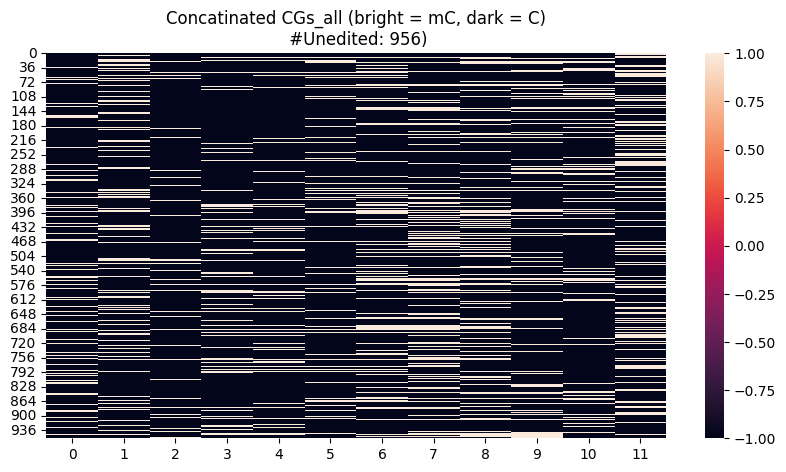

In [22]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()


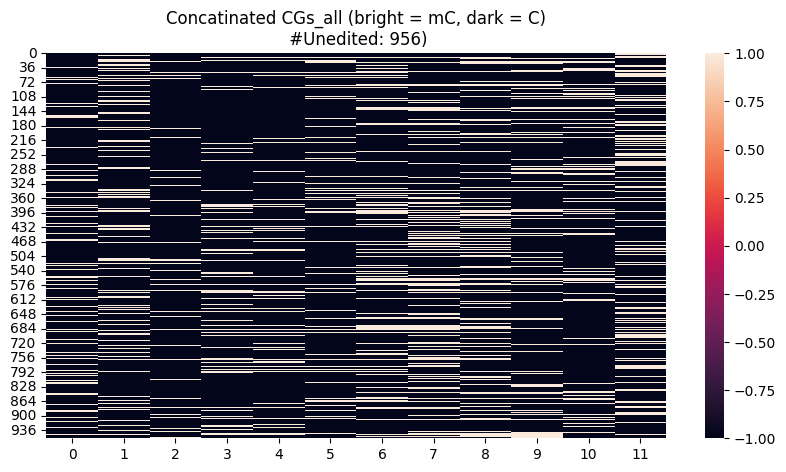

In [23]:
# Remove rows from 3366 to 4116
CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited) #[np.r_[0:1216, 1584:3432]]) #CGs_all_silenced_full.shape[0]]])
CGs_all_unedited_cut, CGs_all_unedited_cut.shape


# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(CGs_all_unedited_cut.fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited_cut.shape[0]})")
plt.show()

In [24]:
# # plot X_unedited_silenced 
# CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[:-16]) #[:-400])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_unedited_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_unedited_cut.shape[0]})")
# plt.show()


In [25]:
CGs_all_unedited = np.array(CGs_all_unedited_cut)
CGs_all_unedited, CGs_all_unedited.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan,  1., ...,  1., nan, nan],
        [nan, nan,  1., ..., nan, nan, nan]]),
 (956, 12))

# Plot the data bars

In [26]:
CG_info_df = pd.read_csv("/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/K562/dimelo_v2_output/CG_info_df_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD459_numRVS903_2025-03-24.csv")
    # '/home/michalula/code/epiCausality/epiCode/T2T_v2.0_mapped/T_cells/dimelo_v2_output/CG_info_df_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1605_numRVS1949_2025-03-24.csv')

CG_pair_idx = CG_info_df['Position_in_region']
print('CG_pair_idx', CG_pair_idx)
CG_info_df 

CG_pair_idx 0       9
1      52
2      57
3      62
4      64
5      66
6      68
7      70
8      72
9      74
10     76
11    116
Name: Position_in_region, dtype: int64


,Unnamed: 0,Position_in_region,Chromosome,Coordinate,CG_number
0,0,9,chr1,206586121,1
1,1,52,chr1,206586164,2
2,2,57,chr1,206586169,3
3,3,62,chr1,206586174,4
4,4,64,chr1,206586176,5
5,5,66,chr1,206586178,6
6,6,68,chr1,206586180,7
7,7,70,chr1,206586182,8
8,8,72,chr1,206586184,9
9,9,74,chr1,206586186,10


Expend window size by 2 *  50
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
CGs_all_sums  = [ 395.  898.  351.  689.  655.  808. 1018. 1147.  939.  687.  572. 1047.]
CGs_all_sums / len(CGs_all) = [0.17673378 0.40178971 0.15704698 0.3082774  0.29306488 0.36152125
 0.45548098 0.51319911 0.42013423 0.30738255 0.25592841 0.46845638]
len(CGs_all) = 2235
CGs_all.shape = (2235, 12)
len(CGs_all_on_fwd_C_sums) = 131
CGs_all_on_fwd_C_sums.shape = (131,)
CGs_all_on_fwd_C_sums = [   0.    0.    0.    0.    0.    0.    0.    0.    0.  395.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.  898.    0.    0.    0.    0.  351.    0.    0.
    0.    0.  689.    0.  655.    0.  808.    0. 1018.    0. 1147.    0.


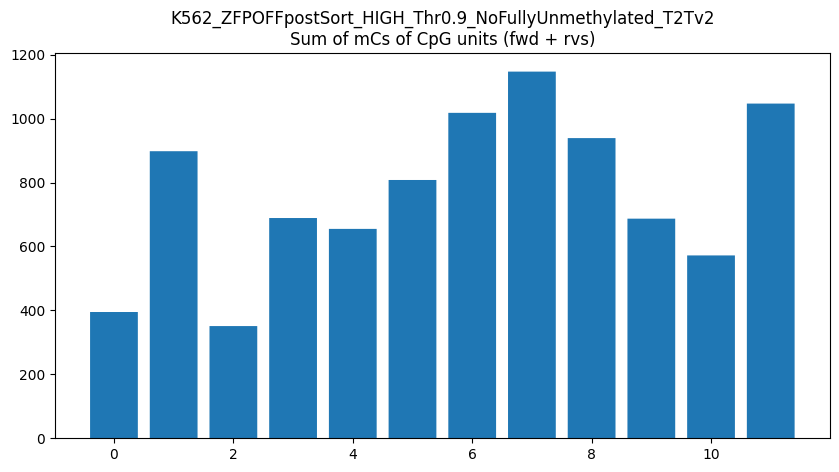

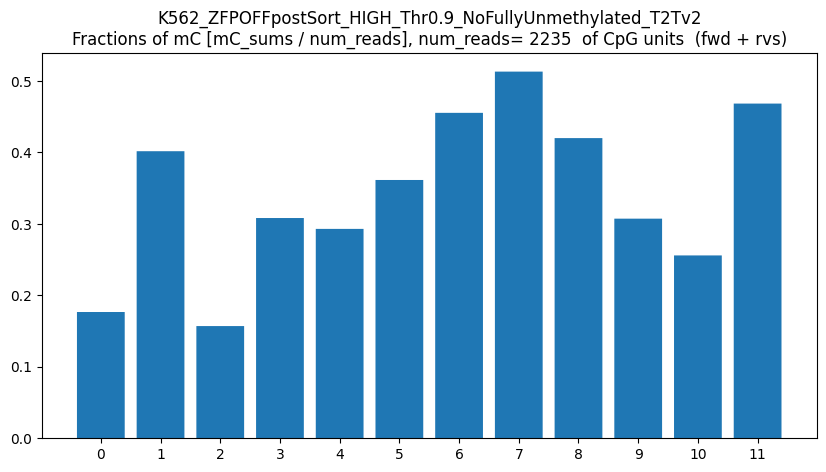

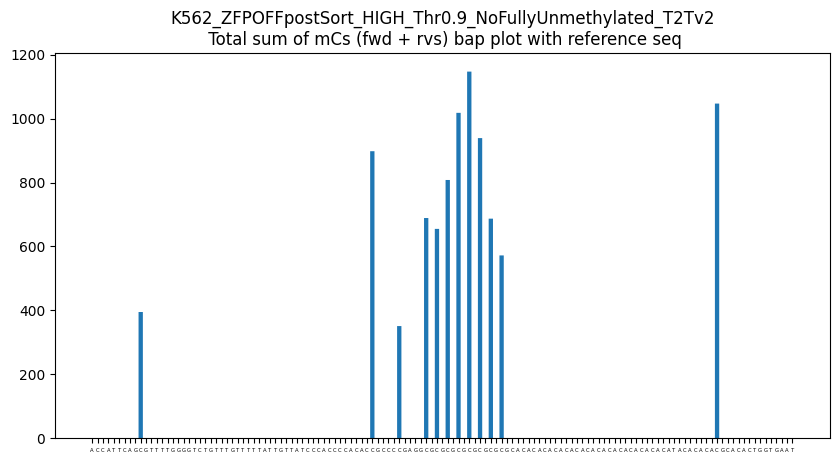

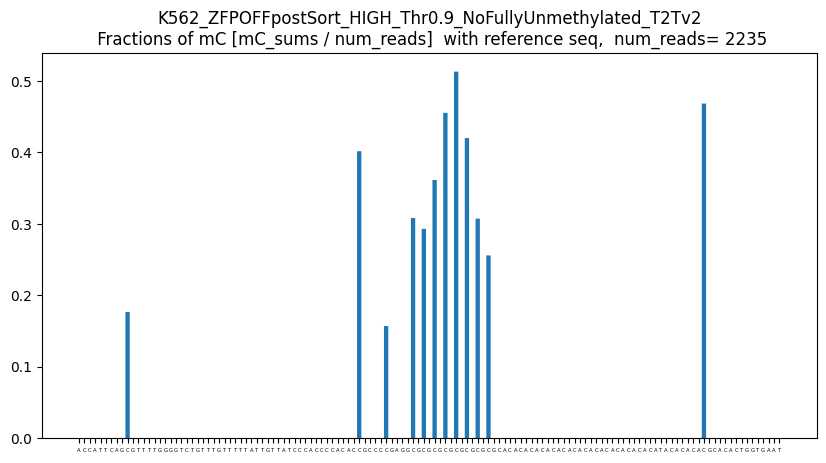

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In [31]:
# Make sure to use UpperCase fasta in the Reference genome, so that the mapping of the sequence is got giving erorrs
# awk '{if ($0 ~ /^>/) print $0; else print toupper($0)}' /home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa > /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
# samtools faidx /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
# '/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa')
reg_genome_version = "t2t_v2_0"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192

# Expend window size
expand_window_size = 50 # 500 #500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1

# # FULL 7 KB WINDOW: 1:206583000-206590000
# region_start = 206583000   # 206586162
# region_end = 206590000 # 20658619

CG_pair_idx = np.asarray(CG_pair_idx)
CG_pair_idx.shape

date_today = datetime.today().strftime('%Y-%m-%d')

ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

experiment_name = "K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2"
plot_mCG_bars(CGs_all_silenced_cut, CG_pair_idx, ref_seq_list, experiment_name)


CGs_all_sums  = [154. 210.  95. 143. 132. 158. 212. 269. 228. 165. 153. 256.]
CGs_all_sums / len(CGs_all) = [0.16108787 0.21966527 0.09937238 0.14958159 0.13807531 0.16527197
 0.22175732 0.28138075 0.23849372 0.17259414 0.16004184 0.26778243]
len(CGs_all) = 956
CGs_all.shape = (956, 12)
len(CGs_all_on_fwd_C_sums) = 131
CGs_all_on_fwd_C_sums.shape = (131,)
CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0.   0. 154.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 210.   0.   0.   0.
   0.  95.   0.   0.   0.   0. 143.   0. 132.   0. 158.   0. 212.   0.
 269.   0. 228.   0. 165.   0. 153.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 256.   0.   0.   0.   0.   0.

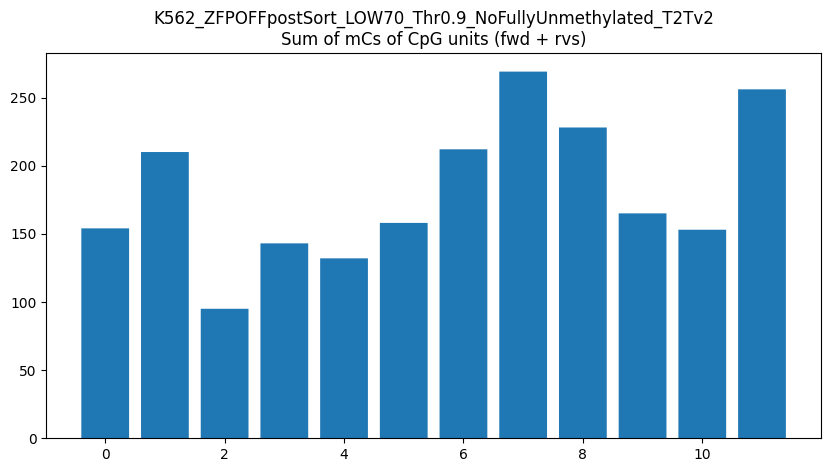

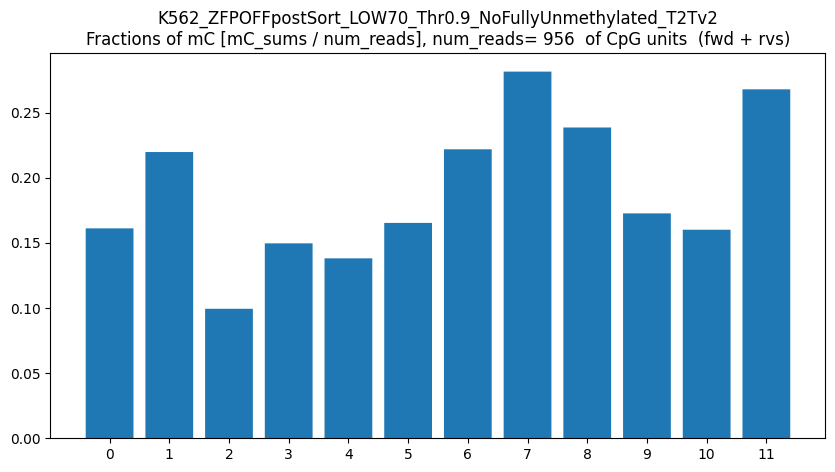

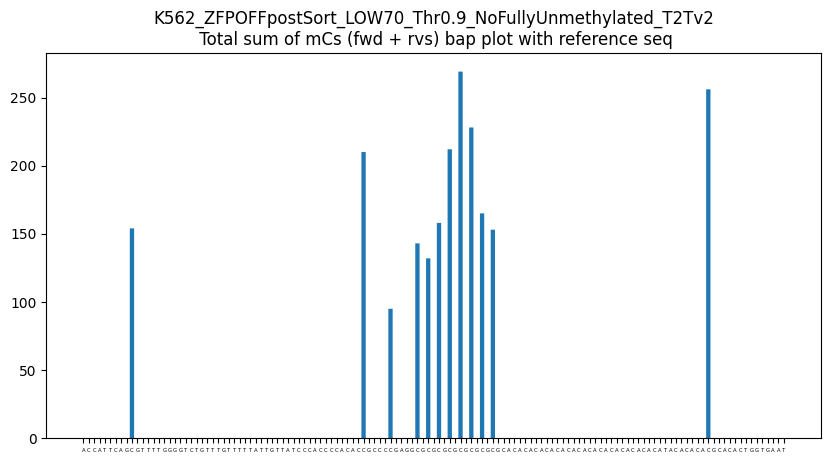

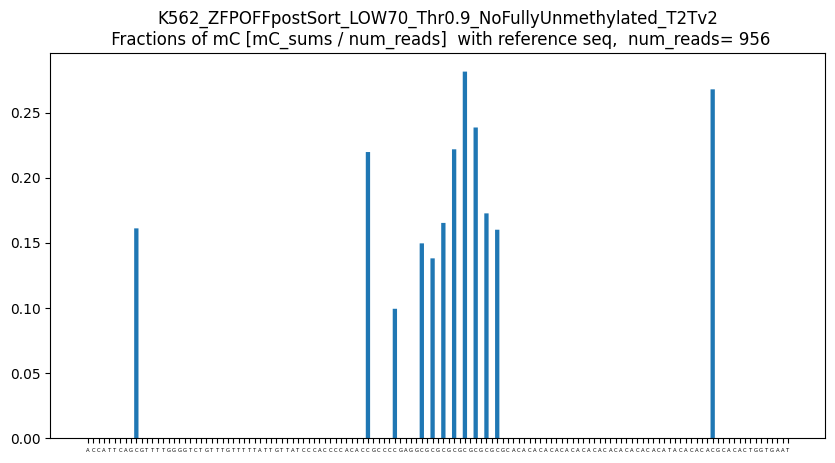

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In [32]:
experiment_name = "K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_T2Tv2"
plot_mCG_bars(CGs_all_unedited_cut, CG_pair_idx, ref_seq_list, experiment_name)


# Plot together the CG fractions

In [38]:
np.nansum(CGs_all_unedited_cut.values, axis=0) / len(CGs_all_unedited_cut)

array([0.16108787, 0.21966527, 0.09937238, 0.14958159, 0.13807531,
       0.16527197, 0.22175732, 0.28138075, 0.23849372, 0.17259414,
       0.16004184, 0.26778243])

In [39]:
len(CGs_all_unedited_cut)

956

In [40]:
# CGs_all_unedited_cut
CGs_all = CGs_all_unedited_cut
CGs_all_sums = np.nansum(CGs_all.values, axis=0)
CGs_all_on_fwd_C_sums = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums[CG_pair_idx] = CGs_all_sums
mC_fracs = CGs_all_sums / len(CGs_all)
print("CGs_all_sums  =", CGs_all_sums)
print("CGs_all_sums / len(CGs_all) =", CGs_all_sums / len(CGs_all))


CGs_all_sums  = [154. 210.  95. 143. 132. 158. 212. 269. 228. 165. 153. 256.]
CGs_all_sums / len(CGs_all) = [0.16108787 0.21966527 0.09937238 0.14958159 0.13807531 0.16527197
 0.22175732 0.28138075 0.23849372 0.17259414 0.16004184 0.26778243]


In [42]:
# CGs_all_silenced_cut_frac

In [43]:
len(CGs_all_unedited_cut) 

956

In [46]:
# len(CGs_all_silenced_cut_sums) 

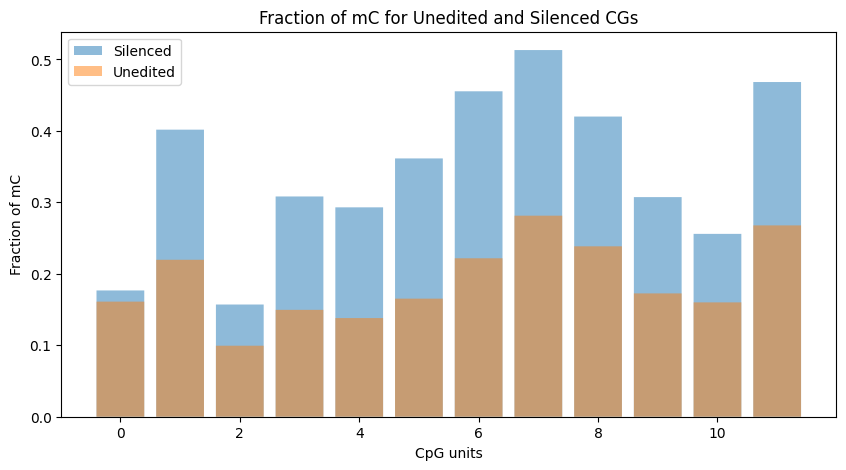

In [47]:
# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_cut.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_cut) 

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_cut.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_cut) 

# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_frac, snap=False, alpha=0.5, label='Silenced')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_frac, snap=False, alpha=0.5, label='Unedited')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

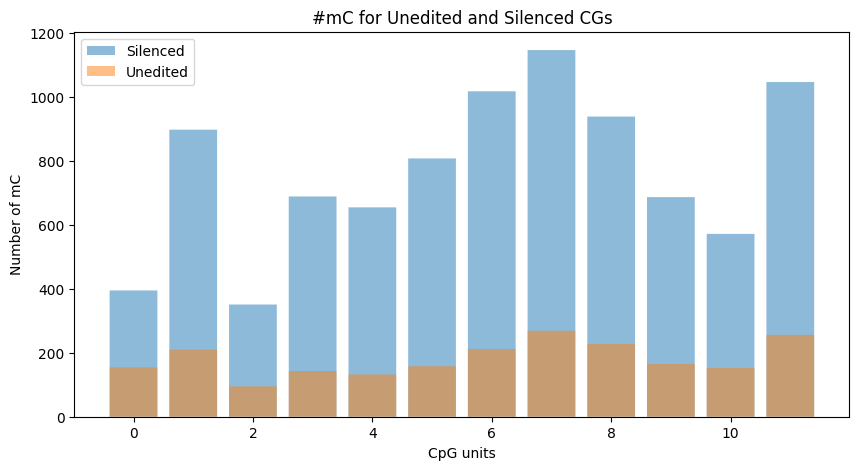

In [48]:
# import matplotlib.pyplot as plt

# # Calculate the fraction of mC for both DataFrames
# CGs_all_unedited_cut['fraction_mC'] = CGs_all_unedited_cut['mC_sums'] / CGs_all_unedited_cut['num_reads']
# CGs_all_silenced_cut['fraction_mC'] = CGs_all_silenced_cut['mC_sums'] / CGs_all_silenced_cut['num_reads']

CGs_all_unedited_cut_sums = np.nansum(CGs_all_unedited_cut.values, axis=0) 
CGs_all_unedited_cut_frac = CGs_all_unedited_cut_sums / len(CGs_all_unedited_cut) 

CGs_all_silenced_cut_sums = np.nansum(CGs_all_silenced_cut.values, axis=0) 
CGs_all_silenced_cut_frac = CGs_all_silenced_cut_sums / len(CGs_all_silenced_cut) 

# Plot the fraction mC for CGs_all_unedited_cut
# plt.bar(CGs_all_unedited_cut.index, CGs_all_unedited_cut_frac, alpha=0.5, label='Unedited')

plt.figure(figsize=(10, 5))
# Plot the fraction mC for CGs_all_silenced_cut
plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_silenced_cut_sums, snap=False, alpha=0.5, label='Silenced')

plt.bar(np.arange(len(CGs_all_silenced_cut_sums)), CGs_all_unedited_cut_sums, snap=False, alpha=0.5, label='Unedited')
# plt.title(f"{experiment_name}\nSum of mCs of CpG units (fwd + rvs)")
# plt.show()

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Number of mC')
plt.title('#mC for Unedited and Silenced CGs')
plt.legend()

# Show the plot
plt.show()

# Plot with sequences 

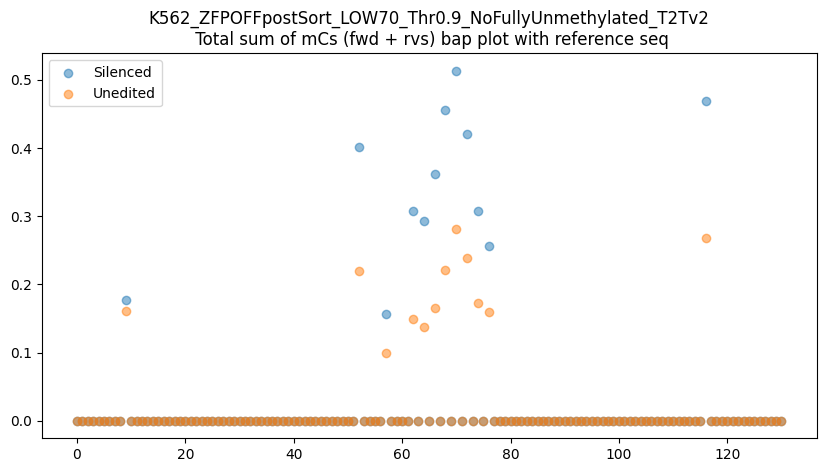

In [49]:
CGs_all_on_fwd_C_sums#[CG_pair_idx] = CGs_all_silenced_cut_sums

# CGs_all_unedited_cut
# CGs_all = CGs_all_unedited_cut
# CGs_all_sums = np.nansum(CGs_all_unedited_cut.values, axis=0)
CGs_all_on_fwd_C_sums_unedited = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_unedited[CG_pair_idx] = CGs_all_unedited_cut_frac #CGs_all_sums


# CGs_all_sums = np.nansum(CGs_all_silenced_cut.values, axis=0)
CGs_all_on_fwd_C_sums_silenced = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_silenced[CG_pair_idx] =  CGs_all_silenced_cut_frac # CGs_all_sums
# mC_fracs = CGs_all_sums / len(CGs_all)


plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
# plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
#
# if len(ref_seq_list) < 160:       
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
plt.title(f"{experiment_name}\n Total sum of mCs (fwd + rvs) bap plot with reference seq")
plt.legend()
plt.show()

# mC_fracs = CGs_all_on_fwd_C_sums / len(CGs_all)
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(mC_fracs)), mC_fracs, snap=False) # , width=0.0001
# if len(ref_seq_list) < 160:               
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
# plt.title(f"{experiment_name}\n Fractions of mC [mC_sums / num_reads]  with reference seq,  num_reads= {len(CGs_all)}")
# plt.show()


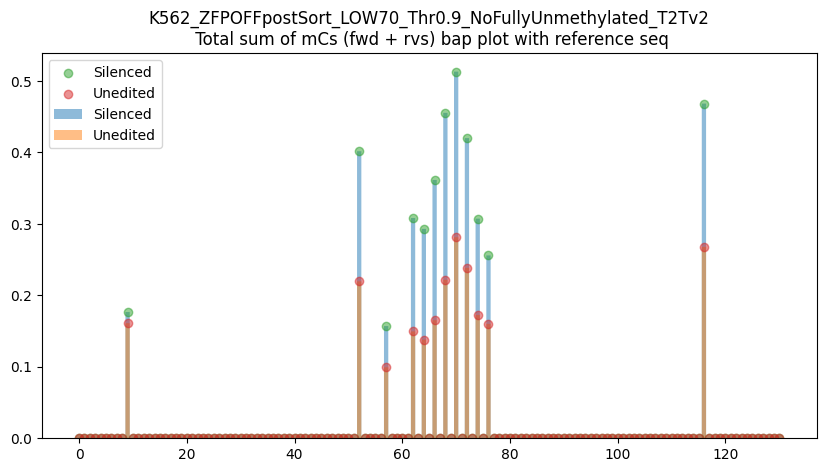

In [50]:
CGs_all_on_fwd_C_sums#[CG_pair_idx] = CGs_all_silenced_cut_sums

# CGs_all_unedited_cut
# CGs_all = CGs_all_unedited_cut
# CGs_all_sums = np.nansum(CGs_all_unedited_cut.values, axis=0)
CGs_all_on_fwd_C_sums_unedited = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_unedited[CG_pair_idx] = CGs_all_unedited_cut_frac #CGs_all_sums


# CGs_all_sums = np.nansum(CGs_all_silenced_cut.values, axis=0)
CGs_all_on_fwd_C_sums_silenced = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_silenced[CG_pair_idx] =  CGs_all_silenced_cut_frac # CGs_all_sums
# mC_fracs = CGs_all_sums / len(CGs_all)


plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
#
# if len(ref_seq_list) < 160:       
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
plt.title(f"{experiment_name}\n Total sum of mCs (fwd + rvs) bap plot with reference seq")
plt.legend()
plt.show()

# mC_fracs = CGs_all_on_fwd_C_sums / len(CGs_all)
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(mC_fracs)), mC_fracs, snap=False) # , width=0.0001
# if len(ref_seq_list) < 160:               
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
# plt.title(f"{experiment_name}\n Fractions of mC [mC_sums / num_reads]  with reference seq,  num_reads= {len(CGs_all)}")
# plt.show()


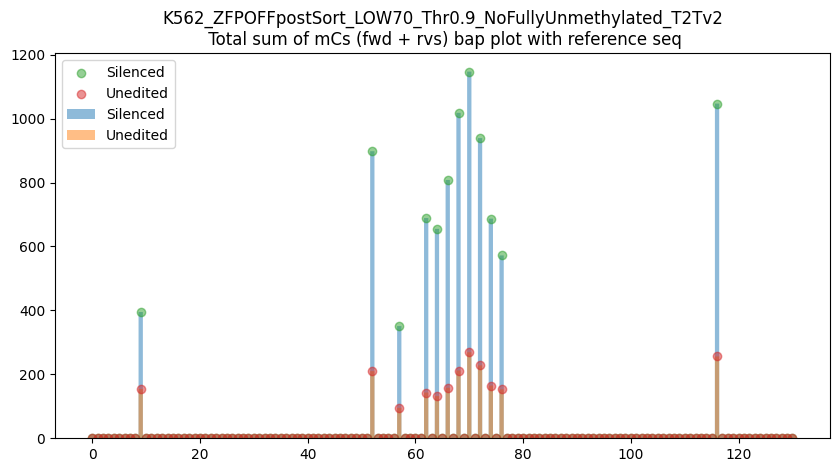

In [51]:
CGs_all_on_fwd_C_sums#[CG_pair_idx] = CGs_all_silenced_cut_sums

# CGs_all_unedited_cut
# CGs_all = CGs_all_unedited_cut
CGs_all_sums = np.nansum(CGs_all_unedited_cut.values, axis=0)
CGs_all_on_fwd_C_sums_unedited = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_unedited[CG_pair_idx] = CGs_all_sums


CGs_all_sums = np.nansum(CGs_all_silenced_cut.values, axis=0)
CGs_all_on_fwd_C_sums_silenced = np.zeros(len(ref_seq_list))
CGs_all_on_fwd_C_sums_silenced[CG_pair_idx] = CGs_all_sums
# mC_fracs = CGs_all_sums / len(CGs_all)


plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.bar(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_silenced)), CGs_all_on_fwd_C_sums_silenced, snap=False, alpha=0.5, label='Silenced') # , width=0.0001
plt.scatter(np.arange(len(CGs_all_on_fwd_C_sums_unedited)), CGs_all_on_fwd_C_sums_unedited, snap=False, alpha=0.5, label='Unedited') # , width=0.0001
# if len(ref_seq_list) < 160:       
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
plt.title(f"{experiment_name}\n Total sum of mCs (fwd + rvs) bap plot with reference seq")
plt.legend()
plt.show()

# mC_fracs = CGs_all_on_fwd_C_sums / len(CGs_all)
# plt.figure(figsize=(10, 5))
# plt.bar(np.arange(len(mC_fracs)), mC_fracs, snap=False) # , width=0.0001
# if len(ref_seq_list) < 160:               
#     plt.xticks(ticks=np.arange(len(ref_seq_list)), labels=ref_seq_list, size=font_size) # 'small') #, rotation=90)
# plt.title(f"{experiment_name}\n Fractions of mC [mC_sums / num_reads]  with reference seq,  num_reads= {len(CGs_all)}")
# plt.show()


# Taking a subset of the bigger set to have equal positive and negative samples

In [52]:
# Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
num_rows = CGs_all_silenced.shape[0]  # Total number of rows
subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
print('subset_size = ', subset_size)

# Randomly select row indices
random_indices = np.random.choice(num_rows, subset_size, replace=False)

# Get the subset
subset = CGs_all_silenced[random_indices]

# Display the shape to confirm
print(subset.shape)  # Should be (subset_size, 10)

CGs_all_silenced = subset
CGs_all_silenced

subset_size =  956
(956, 12)


array([[ 1.,  1.,  1., ..., nan, nan,  1.],
       [ 1., nan, nan, ..., nan, nan, nan],
       [nan,  1.,  1., ..., nan, nan,  1.],
       ...,
       [ 1., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,  1., nan],
       [nan, nan, nan, ...,  1., nan,  1.]])

In [53]:
CGs_all_silenced

array([[ 1.,  1.,  1., ..., nan, nan,  1.],
       [ 1., nan, nan, ..., nan, nan, nan],
       [nan,  1.,  1., ..., nan, nan,  1.],
       ...,
       [ 1., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,  1., nan],
       [nan, nan, nan, ...,  1., nan,  1.]])

In [54]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [55]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [56]:
CGs_all_unedited.shape, CGs_all_silenced.shape

((956, 12), (956, 12))

In [57]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 1., nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan, nan, ...,  1., nan,  1.]]),
 (1912, 12))

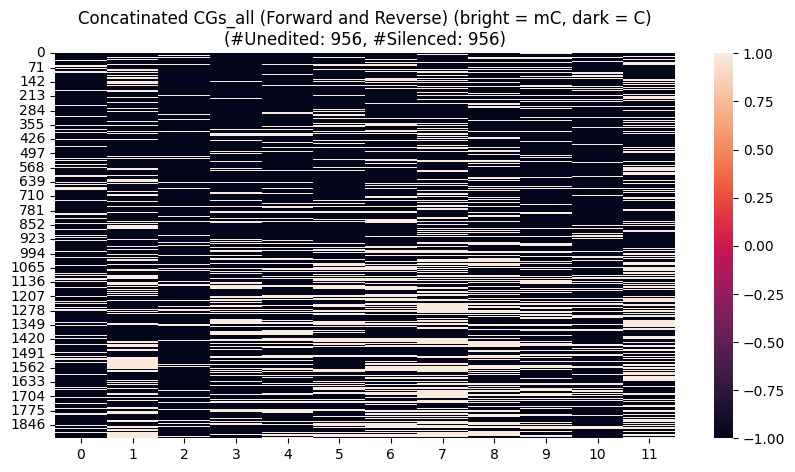

In [58]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [59]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

(array([1, 1, 1, ..., 0, 0, 0]), (1912,))

In [60]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx, len(train_idx), len(test_idx)

(array([1429, 1746, 1052, ...,  121, 1262,  681]),
 array([ 830, 1858, 1286, 1332,  388, 1115, 1271,  362,  379,  450, 1308,
        1041, 1675, 1094,   20, 1293,  702, 1533, 1535,  571, 1764, 1760,
          45, 1210,  198, 1456,  811, 1795, 1063,  474,  565,  130,  289,
         744, 1025,  429, 1457, 1681,  557, 1197, 1219, 1402,   52,  663,
         973,  445,  480, 1185,  872, 1723, 1316,  542, 1367, 1528,  525,
         879,  863,  403, 1825, 1850,  317, 1363,  378, 1678,  902,  369,
          81, 1120, 1235,  625, 1524, 1423,  295, 1215, 1204,  829, 1735,
         461,  885,  951,  580, 1011,  989,  409, 1642,  454, 1603, 1788,
         432,  232,  414, 1193, 1881, 1700,  500,  949,  735, 1590, 1181,
         530, 1701, 1158,  790, 1576, 1221,  527, 1175,  574, 1761, 1014,
         351,  506, 1076,   58,  392, 1291,  342, 1887,  576, 1534,  263,
        1725, 1894, 1234,  996,  244, 1287, 1500, 1342,  733,  628, 1119,
         221,  756,  732,  962,  851,  245, 1868,   43, 1167,

In [61]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
y = y_unedited_silenced

In [62]:
X.iloc[16:23,:]

,0,1,2,3,4,5,6,7,8,9,10,11
16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
17,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
19,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
20,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
22,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0


In [63]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]

In [64]:
def predict_reg(f, X, y):
    preds = f.predict(X)
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    # print('preds=', preds[:16])
    # print('preds_round', preds_round[:16])
    # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
    # print('y', y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
    return np.mean(preds_round==y)*100

model = LinearRegression().fit(X_train,y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

GLM: 68.20%
####
Tree: 65.27%
####
RF: 66.11%
####
GBM: 67.99%
####


NN: 66.11%
####
Sparse GLM: 68.62%


In [65]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_)), print(len(model.coef_[0]))

[[12  2  8  4  7 11  1  6  5  3 10  9]]
[[0.21896737 0.39540651 0.10509193 0.26243032 0.14364497 0.21131916
  0.24683646 0.28337382 0.09006455 0.09442066 0.2388191  0.44948761]]
12


(None, None)

In [66]:
celltypes = ["unedited", "silenced"]
celltypes

['unedited', 'silenced']

In [67]:
# model.coef_

In [68]:
np.arange(1, 11)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [69]:
(model.coef_).shape[1]

12

In [70]:
X_axis = np.arange(1, model.coef_.shape[1]+1)  # +1 # np.arange(10)+1
X_axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [71]:
np.abs(model.coef_)

array([[0.21896737, 0.39540651, 0.10509193, 0.26243032, 0.14364497,
        0.21131916, 0.24683646, 0.28337382, 0.09006455, 0.09442066,
        0.2388191 , 0.44948761]])

/tmp/ipykernel_1284181/3999952595.py:9: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



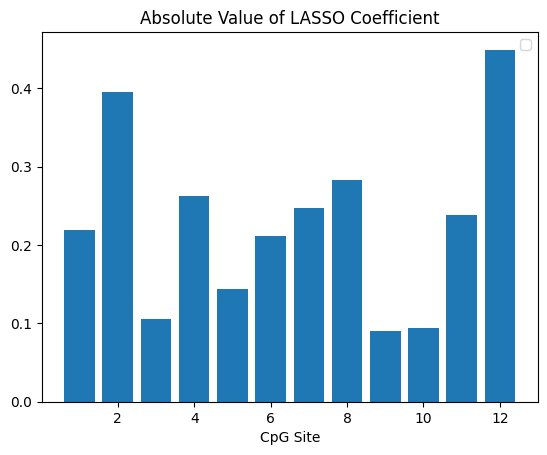

In [72]:

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
# plt.xticks(X_axis)
plt.show()

/tmp/ipykernel_1284181/3309150141.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



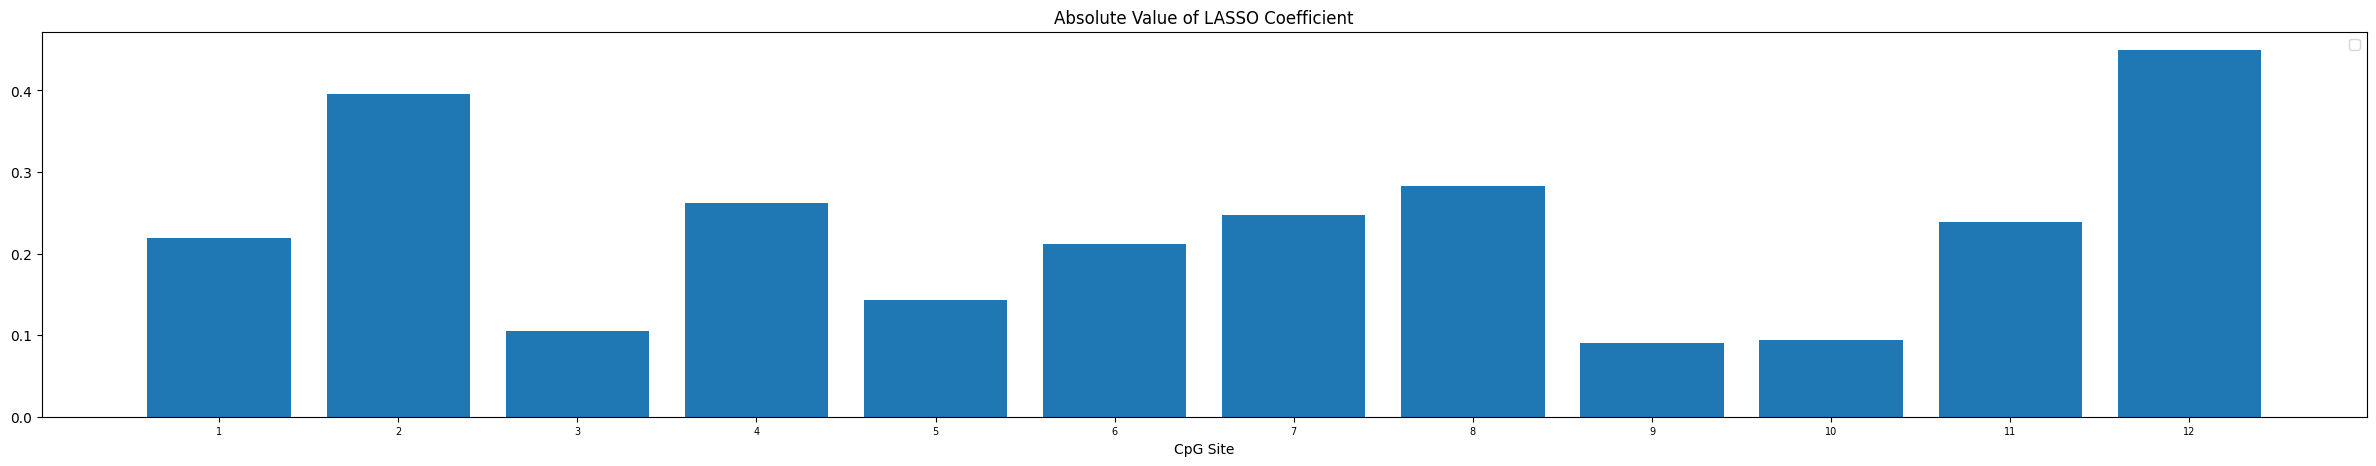

In [73]:
plt.figure(figsize=(30, 5))
X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
# plt.xticks(X_axis)
plt.xticks(X_axis, size=7)
plt.show()

In [74]:
def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == y_test) / len(y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [75]:
# # K-nearest neighbors
# knn = sklearn.neighbors.KNeighborsClassifier()
# knn.fit(X_train, y_train)

# print_accuracy(knn.predict)
# Accuracy = 96.66666666666667 # %
# # Explain a single prediction from the test set
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test.iloc[0, :])
# shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# # Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# # Explain all the predictions in the test set
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# # sample order by similarity

# # f(x)
# # Support vector machine with a linear kernel
# svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# # this is multiclass so we only visualize the contributions to first class (hence index 0)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Text(0.5, 1.0, 'Global SHAP Importances')

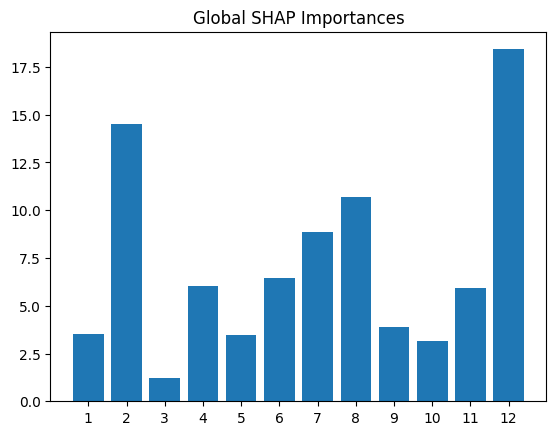

In [76]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.title("Global SHAP Importances")

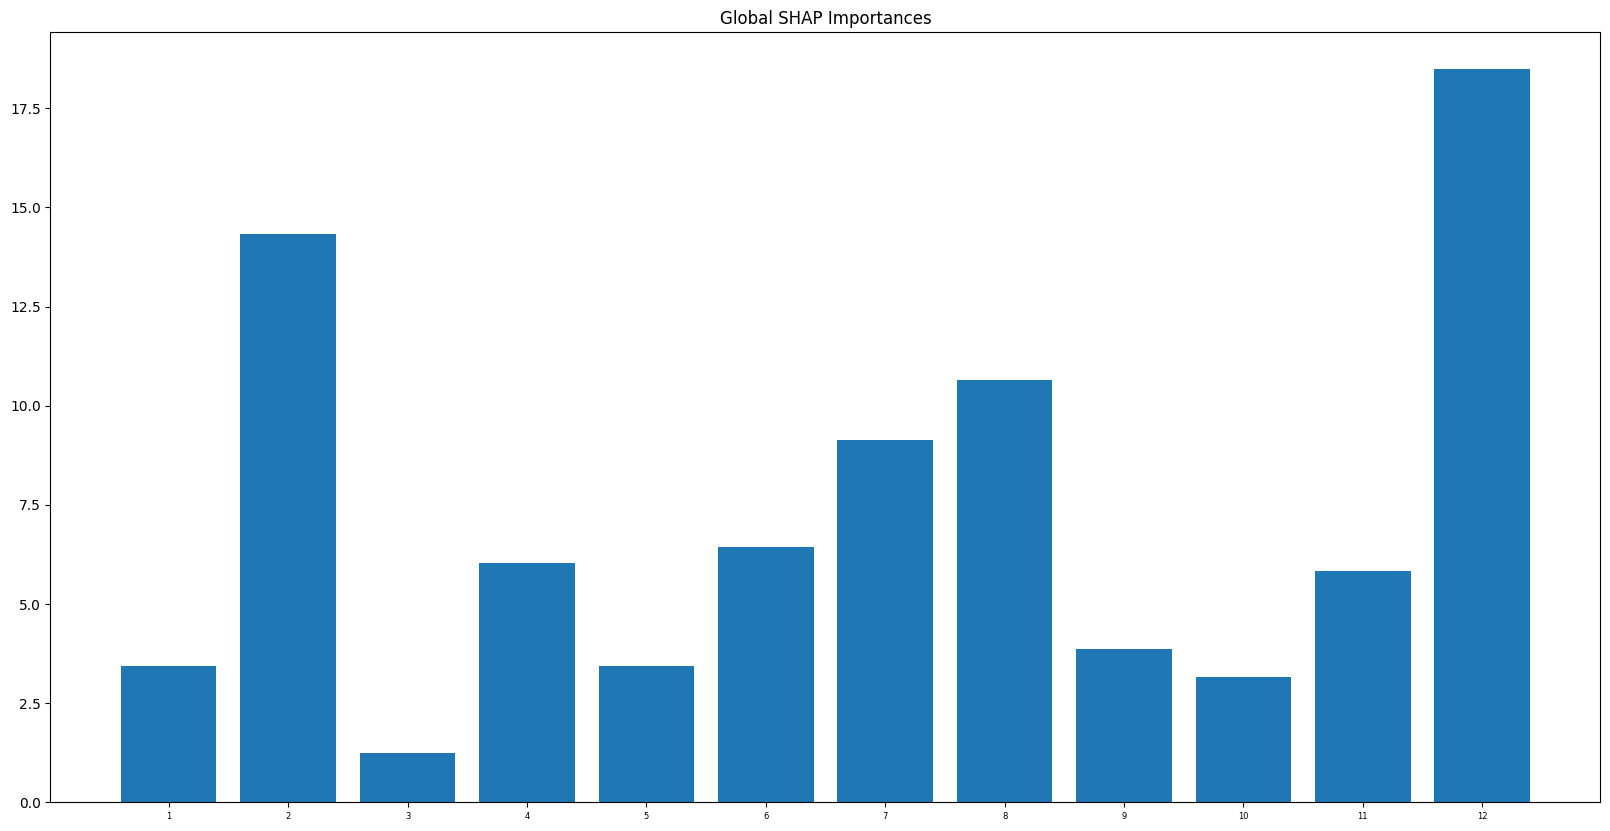

In [77]:
plt.figure(figsize=(20, 10))  # Increase the figure size
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.title("Global SHAP Importances")

plt.xticks(X_axis, size=6)  # Adjust the size of the x-ticks for better visibility
plt.show()

# Add a 1D CNN model + interpret

In [78]:
# # Add a 1D CNN model + interpret
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.utils import shuffle
# from sklearn.inspection import permutation_importance

# # # Create dummy data
# # x_train = np.random.rand(1000, 10, 1)
# # y_train = np.random.rand(1000) * 100

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=x_train.shape), #(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# # Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # To fix the error, change the score_func
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # Create a copy of x_train reshaped for scoring
# x_train_reshaped = x_train.reshape((1000, 10))

# # Calculate permutation importance
# results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [79]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [80]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# # To fix the error, change the score_func:
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# # # Create a copy of x_train reshaped for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # Calculate permutation importance
# results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# Use X_train directly without reshaping
results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

Feature 1 importance: -0.0015341701534170248
Feature 2 importance: -0.02803347280334729
Feature 3 importance: -0.0011157601115760253
Feature 4 importance: -0.008926080892608101
Feature 5 importance: -0.0030683403068340388
Feature 6 importance: -0.004184100418410053
Feature 7 importance: -0.0033472803347280424
Feature 8 importance: -0.004184100418410053
Feature 9 importance: 0.00167364016736401
Feature 10 importance: 0.0001394700139469851
Feature 11 importance: -0.0009762900976290178
Feature 12 importance: -0.04463040446304045


In [81]:
import numpy as np
from sklearn.inspection import permutation_importance

# Ensure X_train is a NumPy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Define scoring function
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Check shape before calling permutation_importance
print("X_train shape:", X_train.shape)

# Calculate permutation importance
results = permutation_importance(model, X_train, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")


X_train shape: (1434, 12)
Feature 1 importance: -0.0029288702928870424
Feature 2 importance: -0.024825662482566246
Feature 3 importance: -0.0016736401673640322
Feature 4 importance: -0.012273361227336143
Feature 5 importance: -0.004463040446304067
Feature 6 importance: -0.008228730822873098
Feature 7 importance: -0.0034867503486750496
Feature 8 importance: -0.003765690376569053
Feature 9 importance: 0.0009762900976289845
Feature 10 importance: 0.00027894002789399244
Feature 11 importance: 0.00041841004184097754
Feature 12 importance: -0.044072524407252456


In [82]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (1434, 12)
y_train shape: (1434,)


<Figure size 2000x2000 with 0 Axes>

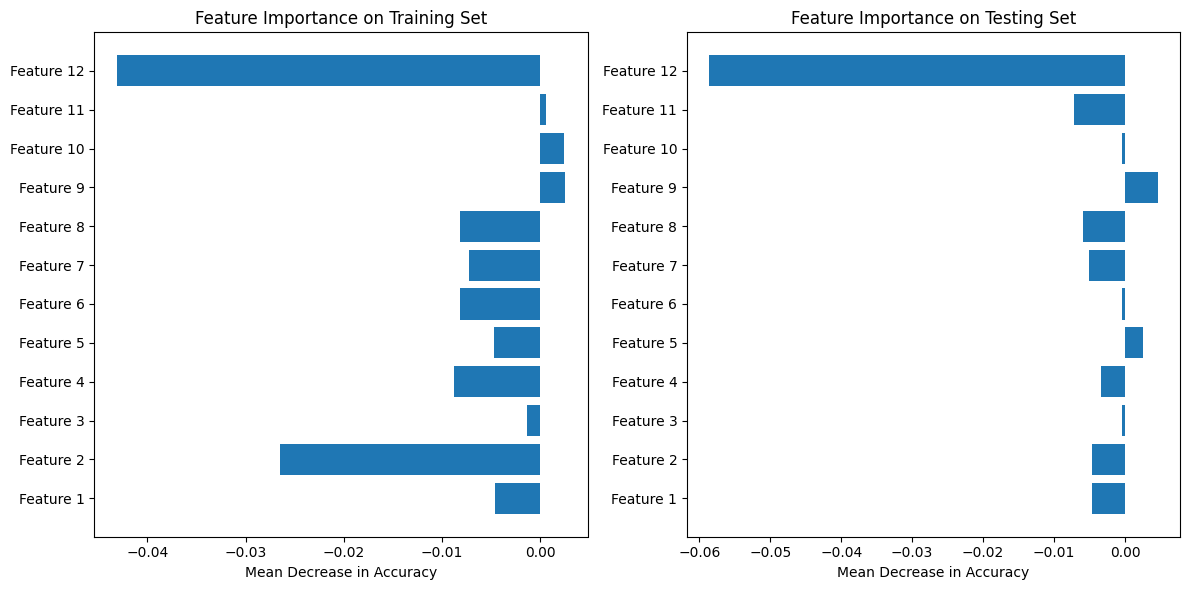

In [83]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

plt.figure(figsize=(20, 20))  # Increase the figure size


# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

<Figure size 1000x10000 with 0 Axes>

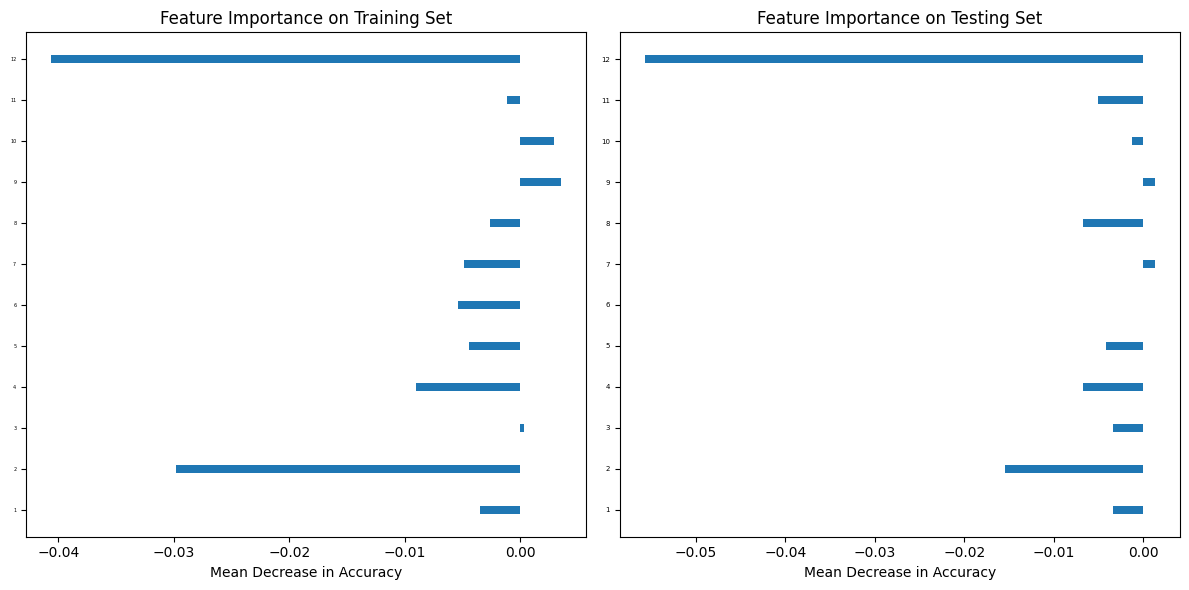

In [84]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 100))  # Increase the figure size

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
# features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
features = [f"{i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean, height=0.2)  # Adjust height for better readability
plt.yticks(fontsize=3.5)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean, height=0.2)  # Adjust height for better readability
plt.yticks(fontsize=5)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

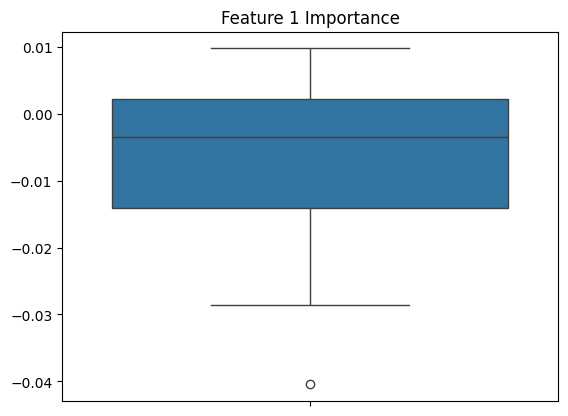

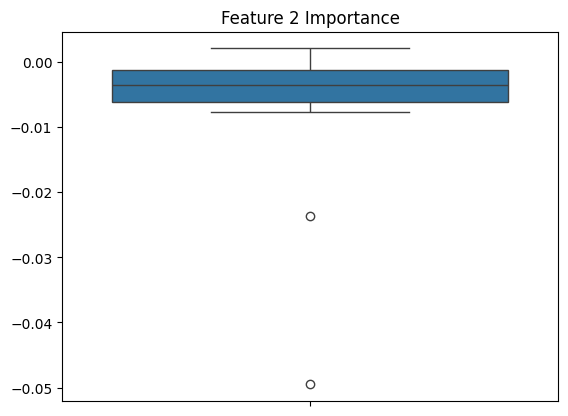

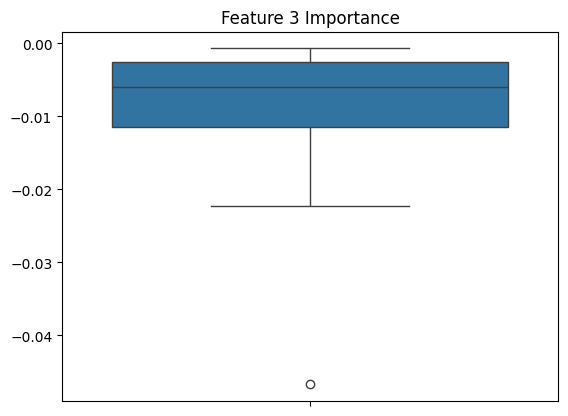

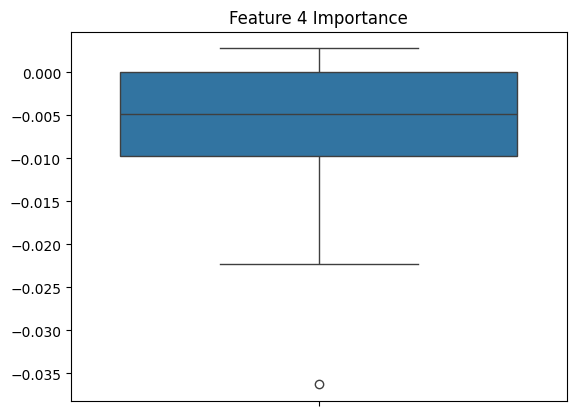

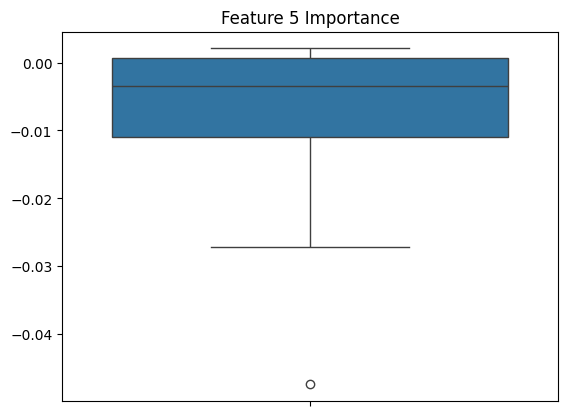

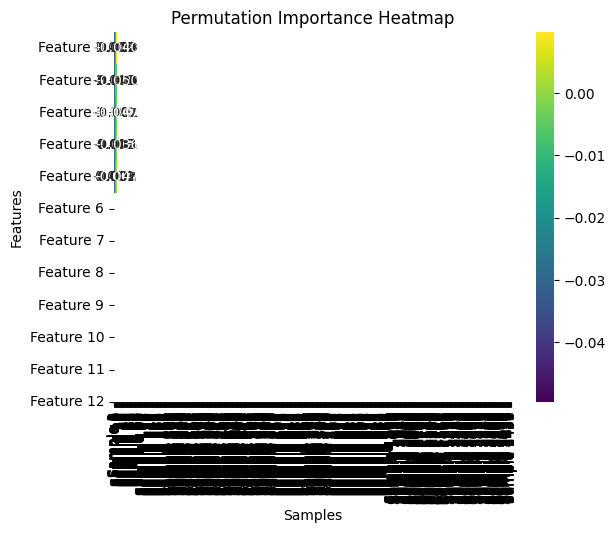

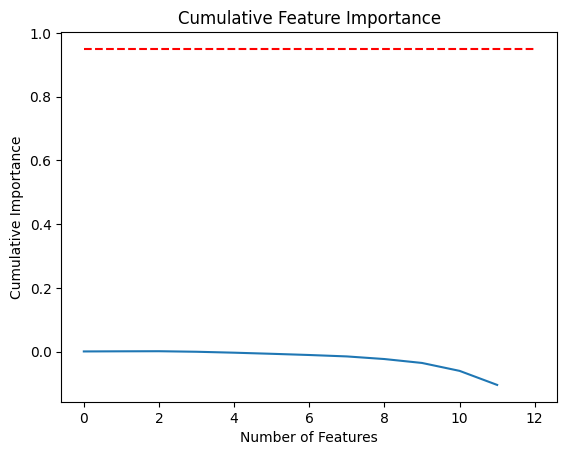

In [85]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


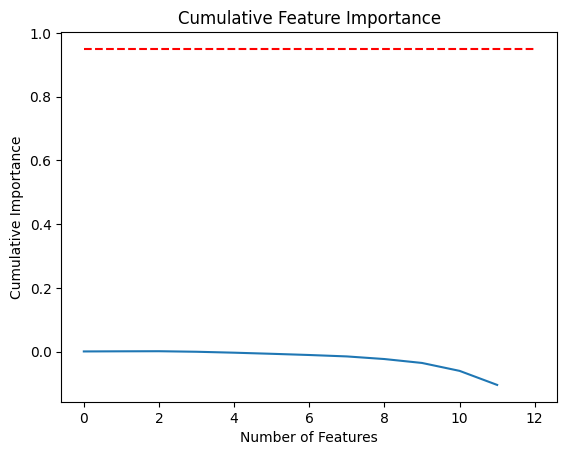

In [86]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

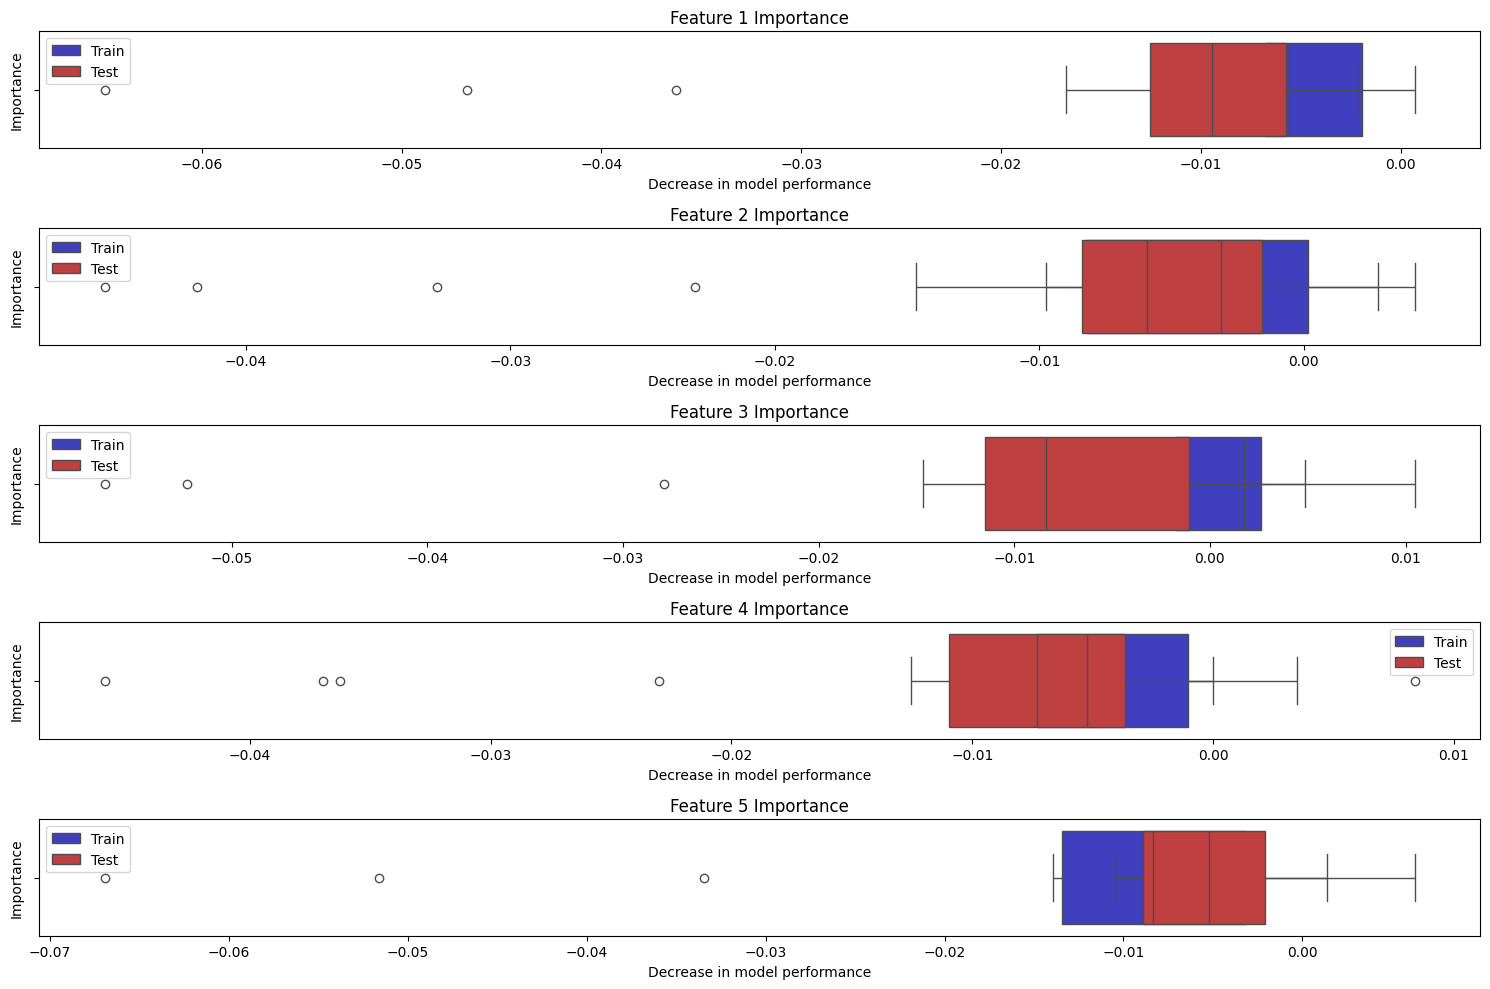

In [87]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [88]:
features, test_results.importances_mean


(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
 array([-7.11297071e-03, -7.11297071e-03, -3.34728033e-03, -7.53138075e-03,
        -5.43933054e-03, -7.53138075e-03, -7.94979079e-03, -5.85774059e-03,
        -1.11022302e-17, -7.94979079e-03, -5.43933054e-03, -5.52301255e-02]))

In [89]:
X_axis


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

/tmp/ipykernel_1284181/1219228298.py:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



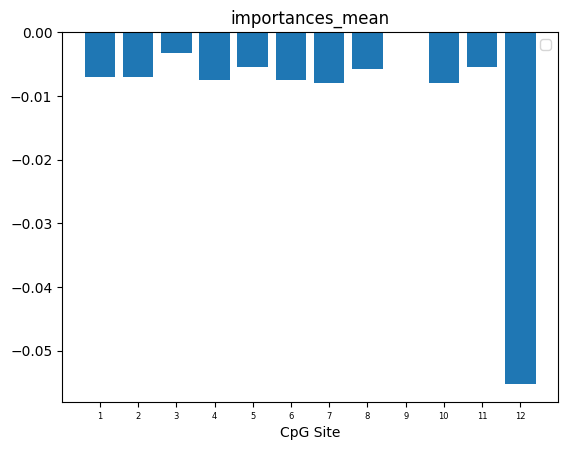

In [90]:
# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=6)
plt.show()

In [91]:
shifts

[-0.4, -0.15]

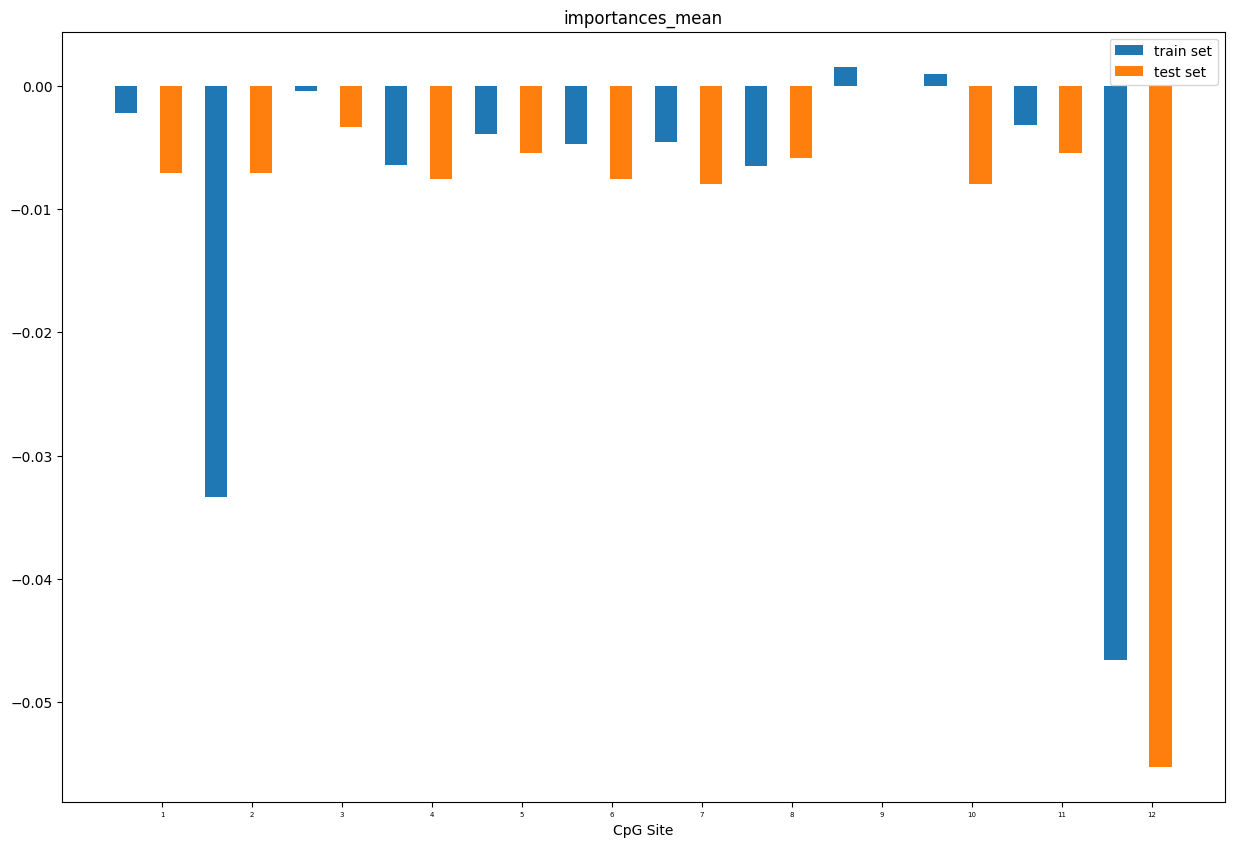

In [92]:
shifts =  [-0.4, 0.1]
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.figure(figsize=(15, 10))

plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

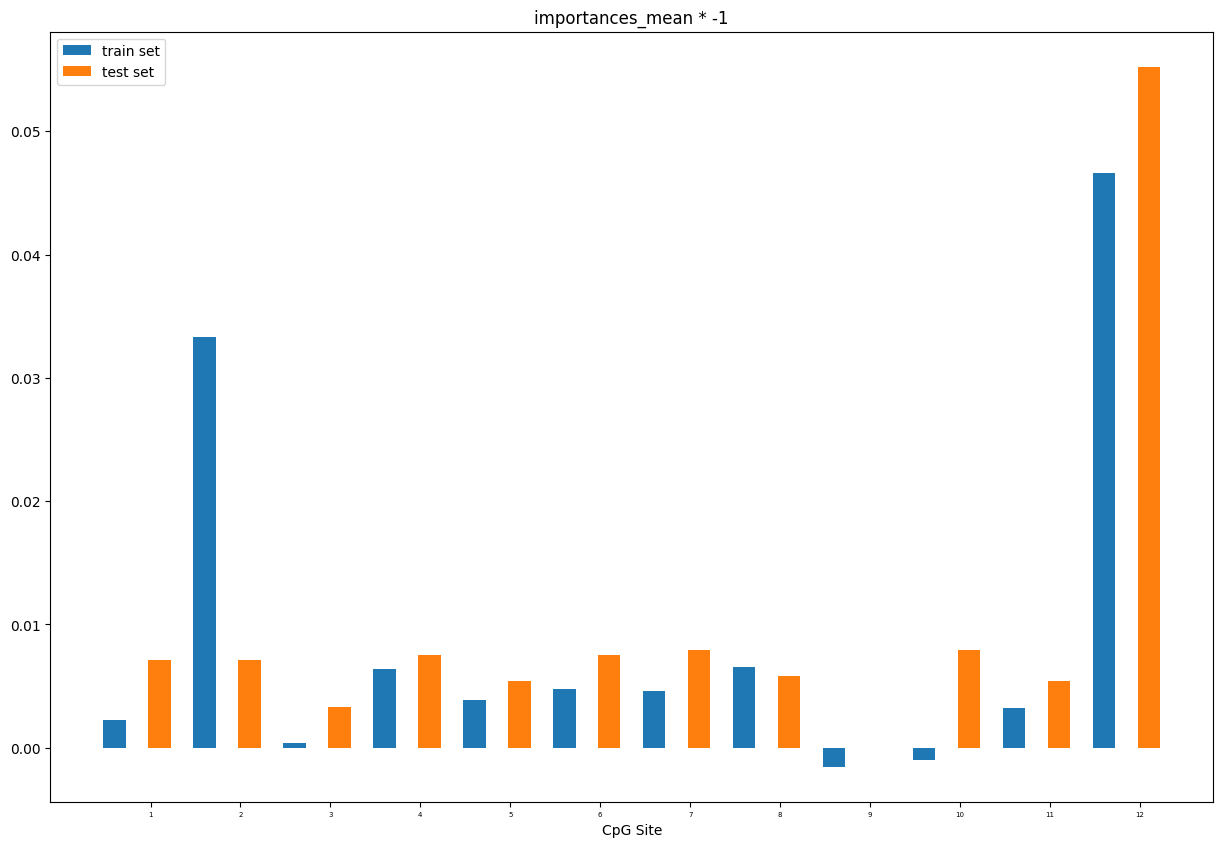

In [93]:
plt.figure(figsize=(15, 10))
plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

In [94]:
# plt.figure(figsize=(15, 10))
# plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

# plt.legend()
# plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis, size=5)
# plt.show()

In [95]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[12  2  8  4  7 11  1  6  5  3 10  9]]
[[0.21896737 0.39540651 0.10509193 0.26243032 0.14364497 0.21131916
  0.24683646 0.28337382 0.09006455 0.09442066 0.2388191  0.44948761]]


In [96]:
celltypes

['unedited', 'silenced']

In [97]:
# for i in range(2):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.show()

In [98]:

# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

In [99]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()